In [1]:
from pynfold import pynFold
import math
from matplotlib import pyplot as plt
import numpy as np

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

ImportError: numpy.core.multiarray failed to import

define some data.

14 truth-level $m$ bins set at
$$
m_n=500\cdot e^{n\cdot0.15}\:\mathrm{ for }\: 0\leq n\leq 14
$$

In [60]:
mn = [500*math.exp(n*0.15) for n in range(15)]

In [61]:
print (mn[:3])

[500.0, 580.9171213641415, 674.9294037880015]


In [62]:
def dndm(m):
    return (1-(m/7000))**6/(m/7000)**4.8

In [63]:
fx = [dndm(mn[i+1]-mn[i]) for i in range(len(mn)-1)]

In [77]:
contents, bins = np.histogram(np.ones(14),bins=mn,weights=fx)
print (bins)

[  500.           580.91712136   674.92940379   784.15609275   911.0594002
  1058.50000831  1229.80155558  1428.82555903  1660.05846137  1928.71276535
  2240.84453517  2603.48991359  3024.82373221  3514.34379029  4083.08495628]


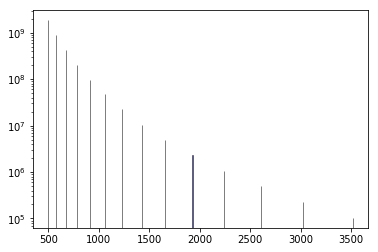

In [105]:
plt.bar(mn[:-1],fx, color='b',alpha=0.5, edgecolor='black')
n = ["{0:.2f}".format(m) for m in mn]
#plt.xticks(np.arange(15)-.5,n, rotation='vertical')
plt.yscale('log')
plt.show()

In [110]:
def smearing(m, a, b):
    sigma = m*((a/math.sqrt(m))+b)
    return m + np.random.normal(0,sigma)

No Smearing in first two bins, high statistics

In [111]:
t = fx[:2]
r = [smearing(m,0,0) for m in t]
print (r)

[1851737884.056259, 891150588.1557999]


migration matrix is given by

In [129]:
M = [[0,0],[0,0]]
for i in range(len(t)):
    for j in range(len(r)):
        if i == j:
            M[i][j] = t[i]/sum(t)
        else:
            M[i][j] = (t[i]-r[i])/sum(t)

In [147]:
print (M)

[[0.6751050590704064, 0.0], [0.0, 0.3248949409295935]]


and now lets try fully bayesian unfolding!

In [145]:
f = pynFold.Fold()
data = [int(no) for no in r]
print (data)
f.data = data
f.response = M
f.lower = [0,0]
f.upper = [3000,3000]

[1851737884, 891150588]


In [143]:
f.run()

TypeError: unsupported operand type(s) for +: 'dict_values' and 'list'

In [151]:
f = pynFold.Fold()
f.data = [10,150]
f.response = [[0.08,0.02], [0.02, 0.08]]
f.lower = [0,0]
f.upper = [3000,3000]
f.run()

TypeError: unsupported operand type(s) for +: 'dict_values' and 'list'